# Import Library

Meng-import library yang akan kita gunakan seperti pandas, numpy, sklearn, dan xgboost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

C:\Users\pikri\miniconda3\envs\jcopdl\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Data Understanding 

## Data Loading 

Membuat variabel `df` untuk menampung dataset dan menampilkan 10 baris pertama

In [2]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


## Exploratory Data Analysis 

Melihat info variabel/feature yang ada di dataset dan melihat ukuran dataset

In [3]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

(40034, 13)

Melihat ringkasan singkat tentang dataset

In [4]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


Melihat Missing Value dan Oultier

In [5]:
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

Visualisasi pada fitur 'Age' untuk melihat outliers

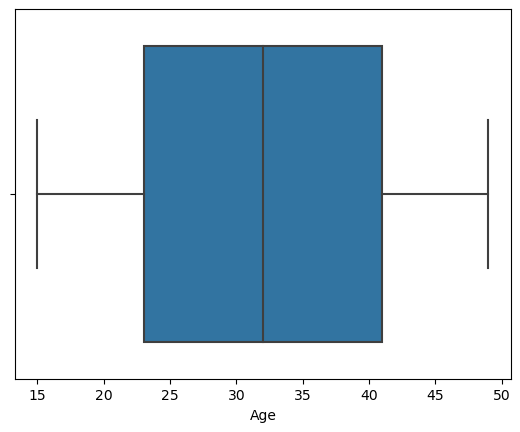

In [6]:
sns.boxplot(data=df,x=df['Age']);

Visualisasi pada fitur 'PlayTimeHours' untuk melihat outliers

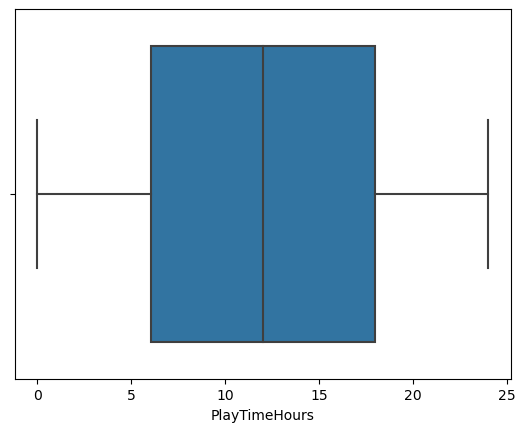

In [7]:
sns.boxplot(data=df,x=df['PlayTimeHours']);

Visualisasi pada fitur 'SessionsPerWeek' untuk melihat outliers

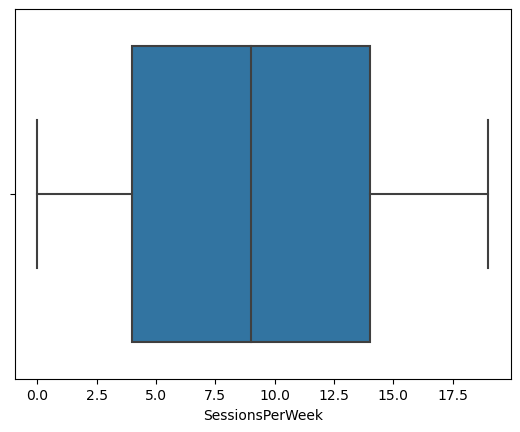

In [8]:
sns.boxplot(data=df,x=df['SessionsPerWeek']);

Visualisasi pada fitur 'AvgSessionDurationMinutes' untuk melihat outliers

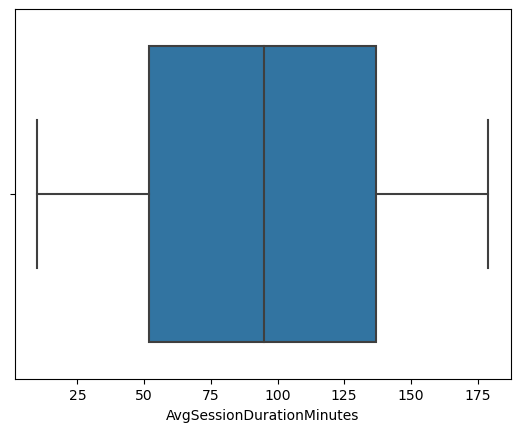

In [9]:
sns.boxplot(data=df,x=df['AvgSessionDurationMinutes']);

Visualisasi pada fitur 'PlayerLevel' untuk melihat outliers

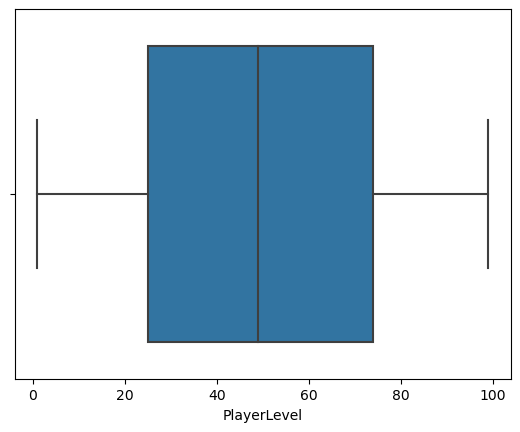

In [10]:
sns.boxplot(data=df,x=df['PlayerLevel']);

Visualisasi pada fitur 'AchievementsUnlocked' untuk melihat outliers

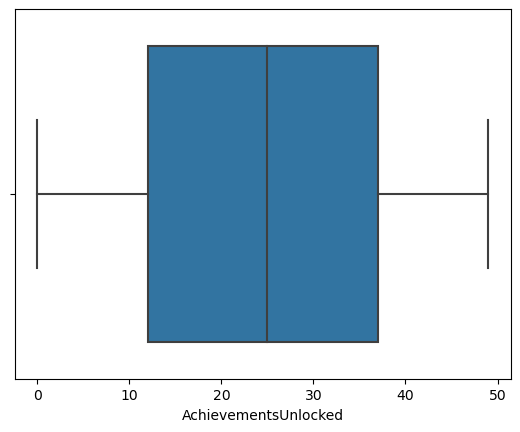

In [11]:
sns.boxplot(data=df,x=df['AchievementsUnlocked']);

#### Data kita bersih dari outlier 

Univariate Analysis untuk fitur numerik

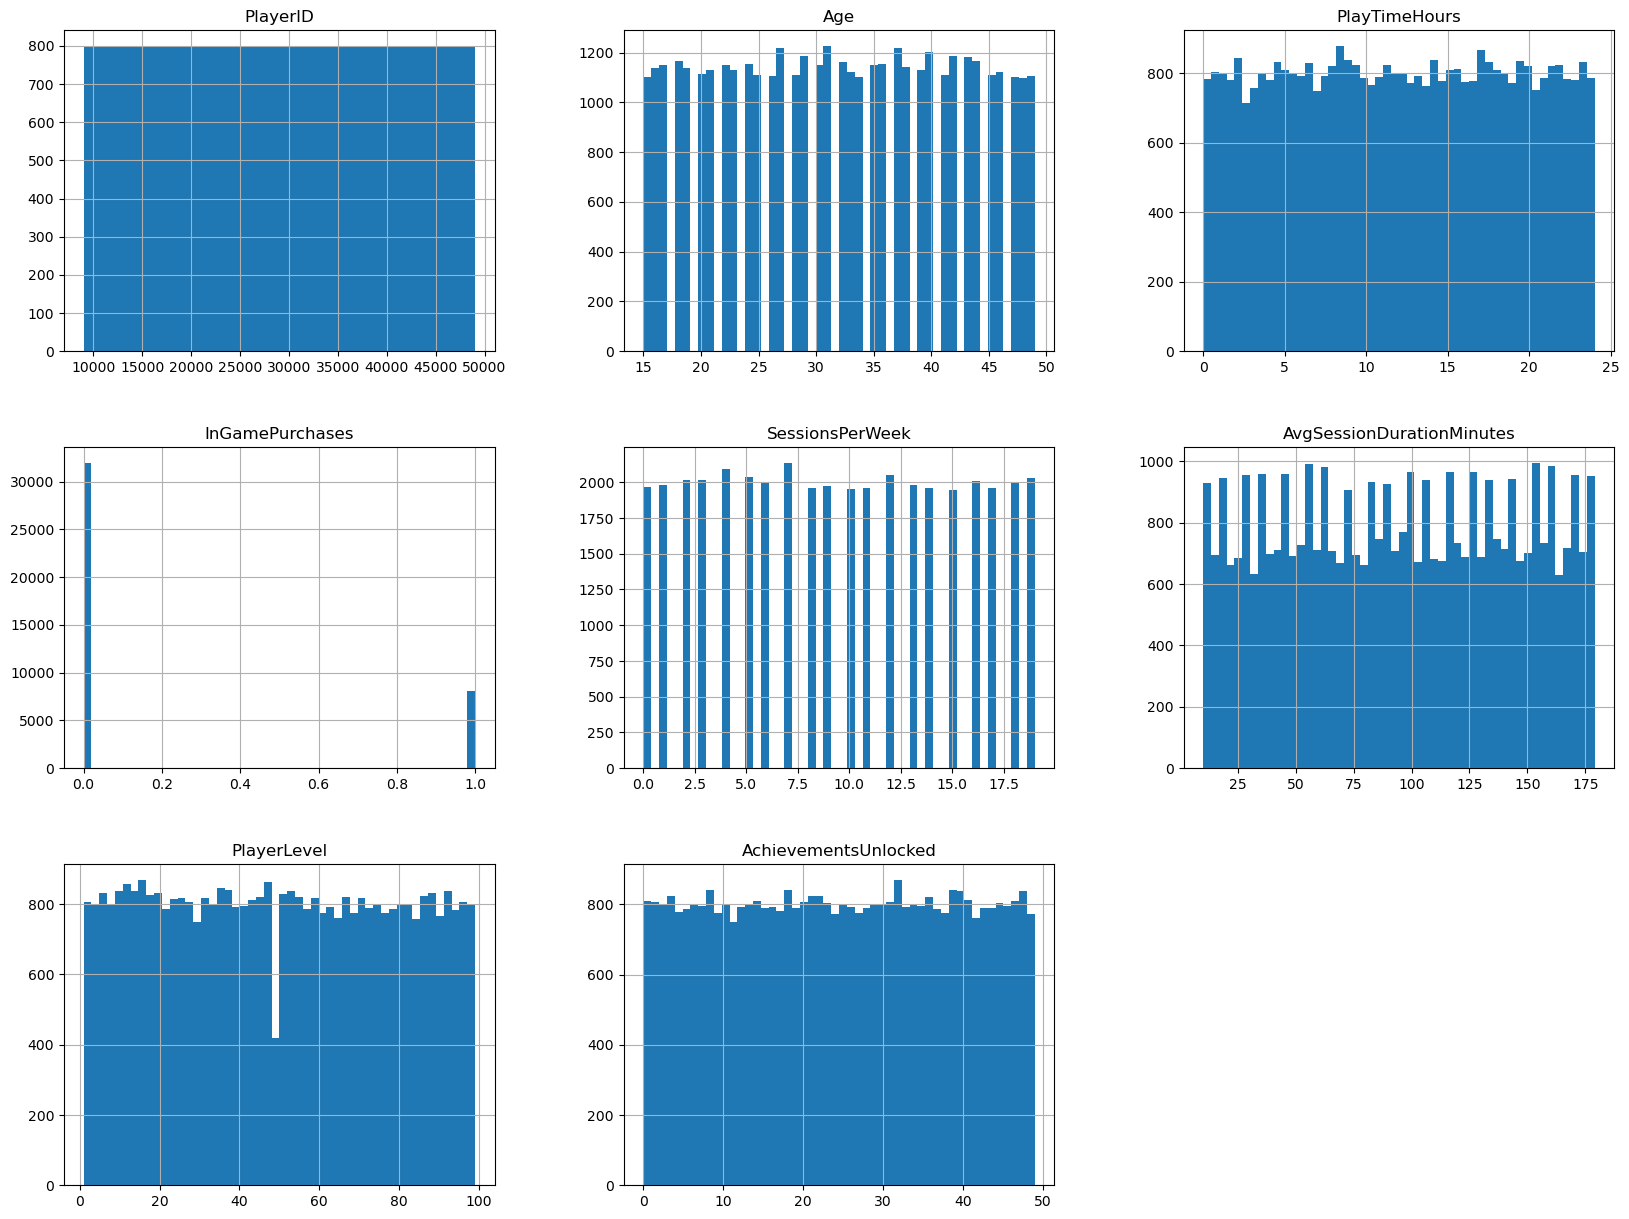

In [12]:
df.hist(bins=50,figsize=(20,15))
plt.show();

Univariate Analysis untuk fitur 'Gender'

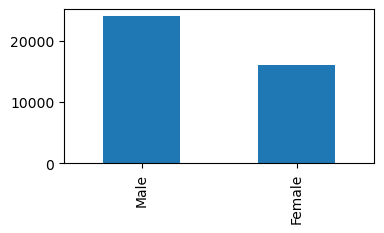

In [13]:
df['Gender'].value_counts().plot(kind='bar',figsize=(4,2));

Univariate Analysis untuk fitur 'Location'

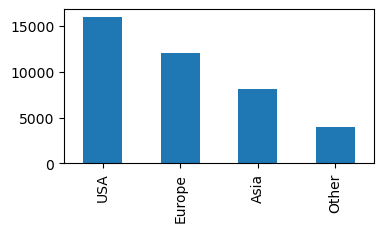

In [14]:
df['Location'].value_counts().plot(kind='bar',figsize=(4,2));

Univariate Analysis untuk fitur 'GameGenre'

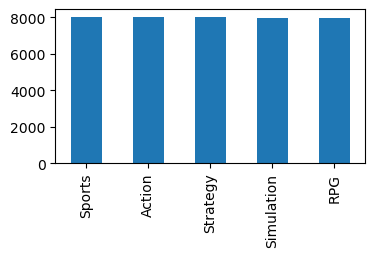

In [15]:
df['GameGenre'].value_counts().plot(kind='bar',figsize=(4,2));

Univariate Analysis untuk fitur 'GameDifficulty'

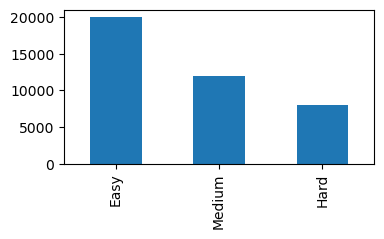

In [16]:
df['GameDifficulty'].value_counts().plot(kind='bar',figsize=(4,2));

#### Multivariate Analysis 

Untuk melakukan multivariate analysis kita harus mencopy dataframe agar data asli tetap konsisten
dan mengubah target menjadi tipe datanumerik/angka.
'Low':0,'Medium':1,'High':2, 

In [17]:
df_copy = df.copy()
df_copy['EngagementLevel'] = df_copy['EngagementLevel'].map({'Low':0,'Medium':1,'High':2})
df_copy.dtypes

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel                int64
dtype: object

Melihat korelasi antar fitur dan target

C:\Users\pikri\AppData\Local\Temp\ipykernel_4004\3206349401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(),annot=True);


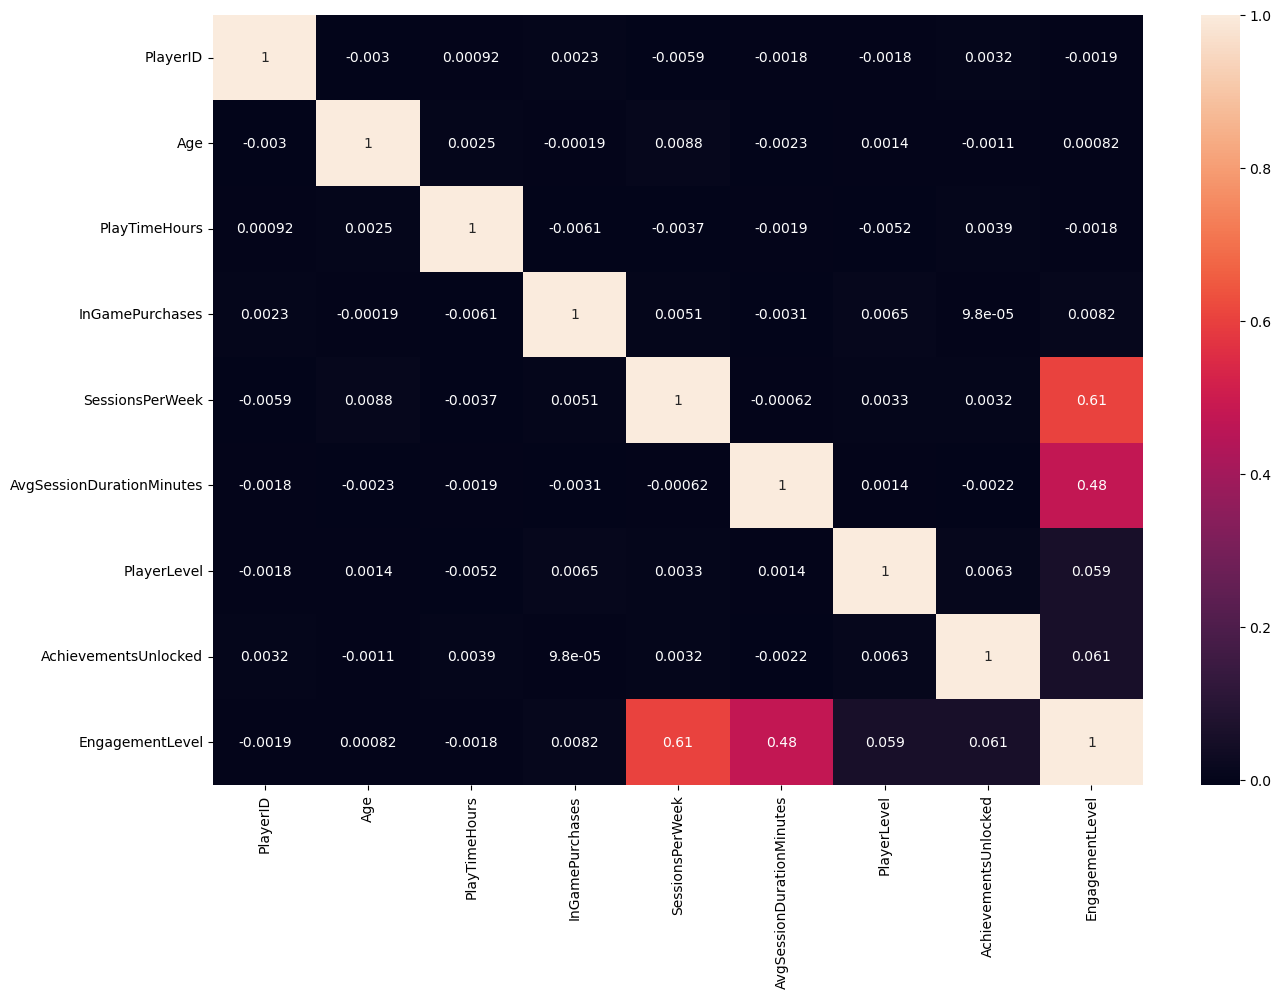

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True);

# Data Preparation

Konversi target ke tipe data numerik

In [6]:
df['EngagementLevel'] = df['EngagementLevel'].map({'Low':0,'Medium':1,'High':2})

Data Splitting dan Encode fitur kategori

In [7]:
X = df.drop(columns=['PlayerID','EngagementLevel'])
y = df.EngagementLevel

# Encode
X_encode = pd.get_dummies(X,columns=['Gender','Location','GameGenre','GameDifficulty'])

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.2,stratify=y,shuffle=True,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32027, 21), (8007, 21), (32027,), (8007,))

# Modeling 

###### Random Forest 

Variabel `rf_clf` berfungsi untuk menampung algoritma `RandomForestClassifier()` dan akan di fit ke data latih

Variabel `y_pred_rf` berfungsi untuk menampung hasil prediksi yang dibuat oleh `rf_clf`

Dan hasil akurasi ditampilkan menggunakan fungsi `accuracy_score`

In [8]:
rf_clf = RandomForestClassifier(random_state=42) 
rf_clf.fit(X_train,y_train)

# Prediksi
y_pred_rf = rf_clf.predict(X_test)
print(f'Akurasi: {accuracy_score(y_test,y_pred_rf)}')

Akurasi: 0.8989634070188585


###### XGBoost 

Variabel `xgb_clf` berfungsi untuk menampung algoritma `XGBClassifier()` dan akan di fit ke data latih

Variabel `y_pred_xgb` berfungsi untuk menampung hasil prediksi yang dibuat oleh `xgb_clf`

Dan hasil akurasi ditampilkan menggunakan fungsi `accuracy_score`

In [9]:
xgb_clf = XGBClassifier(objective='multi:softmax',seed=42)
xgb_clf.fit(X_train,
        y_train,
        verbose=True,
        early_stopping_rounds=20,
        eval_metric='mlogloss',
        eval_set=[(X_test,y_test)])

# Prediksi
y_pred_xgb = xgb_clf.predict(X_test)
print(f'Akurasi: {accuracy_score(y_test,y_pred_xgb)}')

[0]	validation_0-mlogloss:0.81738


C:\Users\pikri\miniconda3\envs\jcopdl\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pikri\miniconda3\envs\jcopdl\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-mlogloss:0.65442
[2]	validation_0-mlogloss:0.54889
[3]	validation_0-mlogloss:0.47889
[4]	validation_0-mlogloss:0.43386
[5]	validation_0-mlogloss:0.40207
[6]	validation_0-mlogloss:0.38055
[7]	validation_0-mlogloss:0.36563
[8]	validation_0-mlogloss:0.35572
[9]	validation_0-mlogloss:0.34881
[10]	validation_0-mlogloss:0.34452
[11]	validation_0-mlogloss:0.34127
[12]	validation_0-mlogloss:0.33941
[13]	validation_0-mlogloss:0.33756
[14]	validation_0-mlogloss:0.33676
[15]	validation_0-mlogloss:0.33553
[16]	validation_0-mlogloss:0.33481
[17]	validation_0-mlogloss:0.33449
[18]	validation_0-mlogloss:0.33462
[19]	validation_0-mlogloss:0.33463
[20]	validation_0-mlogloss:0.33454
[21]	validation_0-mlogloss:0.33463
[22]	validation_0-mlogloss:0.33457
[23]	validation_0-mlogloss:0.33467
[24]	validation_0-mlogloss:0.33480
[25]	validation_0-mlogloss:0.33432
[26]	validation_0-mlogloss:0.33443
[27]	validation_0-mlogloss:0.33449
[28]	validation_0-mlogloss:0.33462
[29]	validation_0-mlogloss:0.

# Evaluation 

Variabel `cm_rf` untuk menampung hasil dari fungsi `confusion_matrix` dari data tes dan prediksi model **RandomForest**

Variabel `disp` untuk menampung hasil dari fungsi ConfusionMatrixDisplay yang akan di tampilkan

Menampilkan hasil dari fungsi `classification_report` untuk melihat hasil dari klasifikasi model kita 

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2065
           1       0.88      0.95      0.91      3875
           2       0.92      0.85      0.88      2067

    accuracy                           0.90      8007
   macro avg       0.90      0.89      0.89      8007
weighted avg       0.90      0.90      0.90      8007



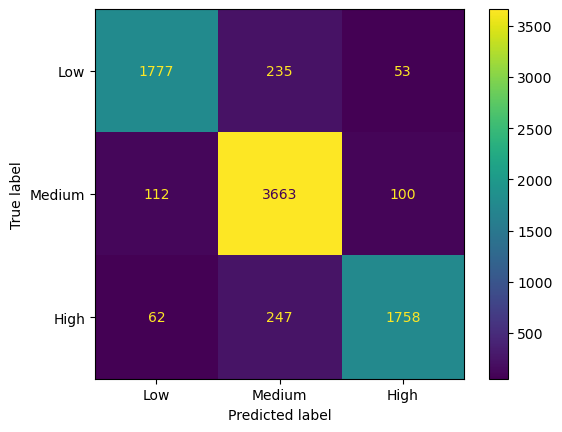

In [10]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=['Low', 'Medium', 'High'])
disp.plot();

print(classification_report(y_test,y_pred_rf))

Variabel `cm_xgb` untuk menampung hasil dari fungsi `confusion_matrix` dari data tes dan prediksi model **XGBoost**

Variabel `disp` untuk menampung hasil dari fungsi `ConfusionMatrixDisplay` yang akan di tampilkan

Menampilkan hasil dari fungsi `classification_report` untuk melihat hasil dari klasifikasi model kita

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2065
           1       0.91      0.95      0.93      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



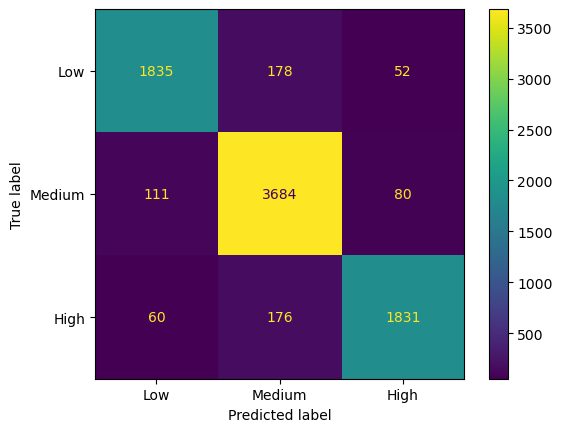

In [11]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=['Low', 'Medium', 'High'])
disp.plot();

print(classification_report(y_test,y_pred_xgb))